In [3]:
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import numpy as np
import pandas as pd
import random, re, math
import matplotlib.pyplot as plt
#import seaborn as sns


In [6]:
DATA_DIR = "C:\\Users\\Sohini Roy\\Documents\\Unet_Project\\Paper-work\\Lung-Data\\covid-segmentation\\"
rad=DATA_DIR + "images_radiopedia.npy", DATA_DIR + "masks_radiopedia.npy"
test=DATA_DIR + "test_images_medseg.npy"


In [7]:
def load_case(image_file, mask_file=None):
    image =np.load(image_file).astype(np.float32)
    if not mask_file is None:
        mask =np.load(mask_file).astype(np.int8)
        return image, mask
    return image

49

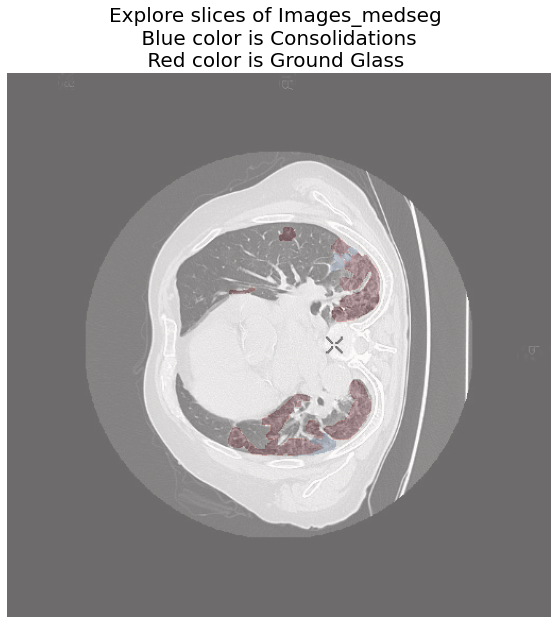

In [8]:
def explore_image(slices):
    plt.figure(figsize=(10, 10))
    plt.imshow(load_case(med[0],med[1])[0][slices, :, :, 0], cmap='gray');
    plt.imshow(load_case(med[0],med[1])[1][slices, :, :, 0].squeeze(), alpha=0.3, cmap='Reds')
    plt.imshow(load_case(med[0],med[1])[1][slices, :, :, 1].squeeze(), alpha=0.2, cmap='Blues')
    plt.title('Explore slices of Images_medseg \n Blue color is Consolidations \n Red color is Ground Glass  ', fontsize=20)
    plt.axis('off')
    return slices


interact(explore_image, slices=(0, load_case(med[0],med[1])[0].shape[0] - 1));

In [9]:
def visualize(batch_1,batch_2,pred=False):
   
    classes_dict = {'Ground_Glass': 0.,
                    'Consolidations': 1.,
                    'Lungs_Other': 2.,
                    'Background': 3. }
                                   
    
    
    fix, ax = plt.subplots(2, 5, figsize=(60, 40))
    
    for i in range(2):
        
        
        ax[i,0].set_xticks([]) 
        ax[i,0].set_yticks([])
        if i==0:
            ax[i,0].imshow(batch_1[0][:,:,0], cmap='Greys')
            ax[i,0].set_ylabel("Ground Truth ", fontsize=55) if pred==True else ax[i,0].set_ylabel("From batch_1 ", fontsize=55)
            for j in range(4):
                mask_f = batch_1[1][:,:,j]
                img_label = list(classes_dict.keys())[j]

                ax[i, j + 1].imshow(mask_f, vmin=0, vmax=1,cmap='cividis')
                ax[i, j + 1].set_xticks([]) 
                ax[i, j + 1].set_yticks([]) 
                ax[i][j + 1].set_title(f"{img_label} ", fontsize=55)
 
        else:
            ax[i,0].imshow(batch_2[0][:,:,0], cmap='Greys')
            ax[i,0].set_ylabel("Prediction", fontsize=55) if pred==True else ax[i,0].set_ylabel("From batch_2 ", fontsize=55)
            for j in range(4):
                mask_f = batch_2[1][:,:,j]
                img_label = list(classes_dict.keys())[j]

                ax[i, j + 1].imshow(mask_f, vmin=0, vmax=1,cmap='cividis')
                ax[i, j + 1].set_xticks([]) 
                ax[i, j + 1].set_yticks([]) 
 
                    

    plt.tight_layout()
    plt.show()

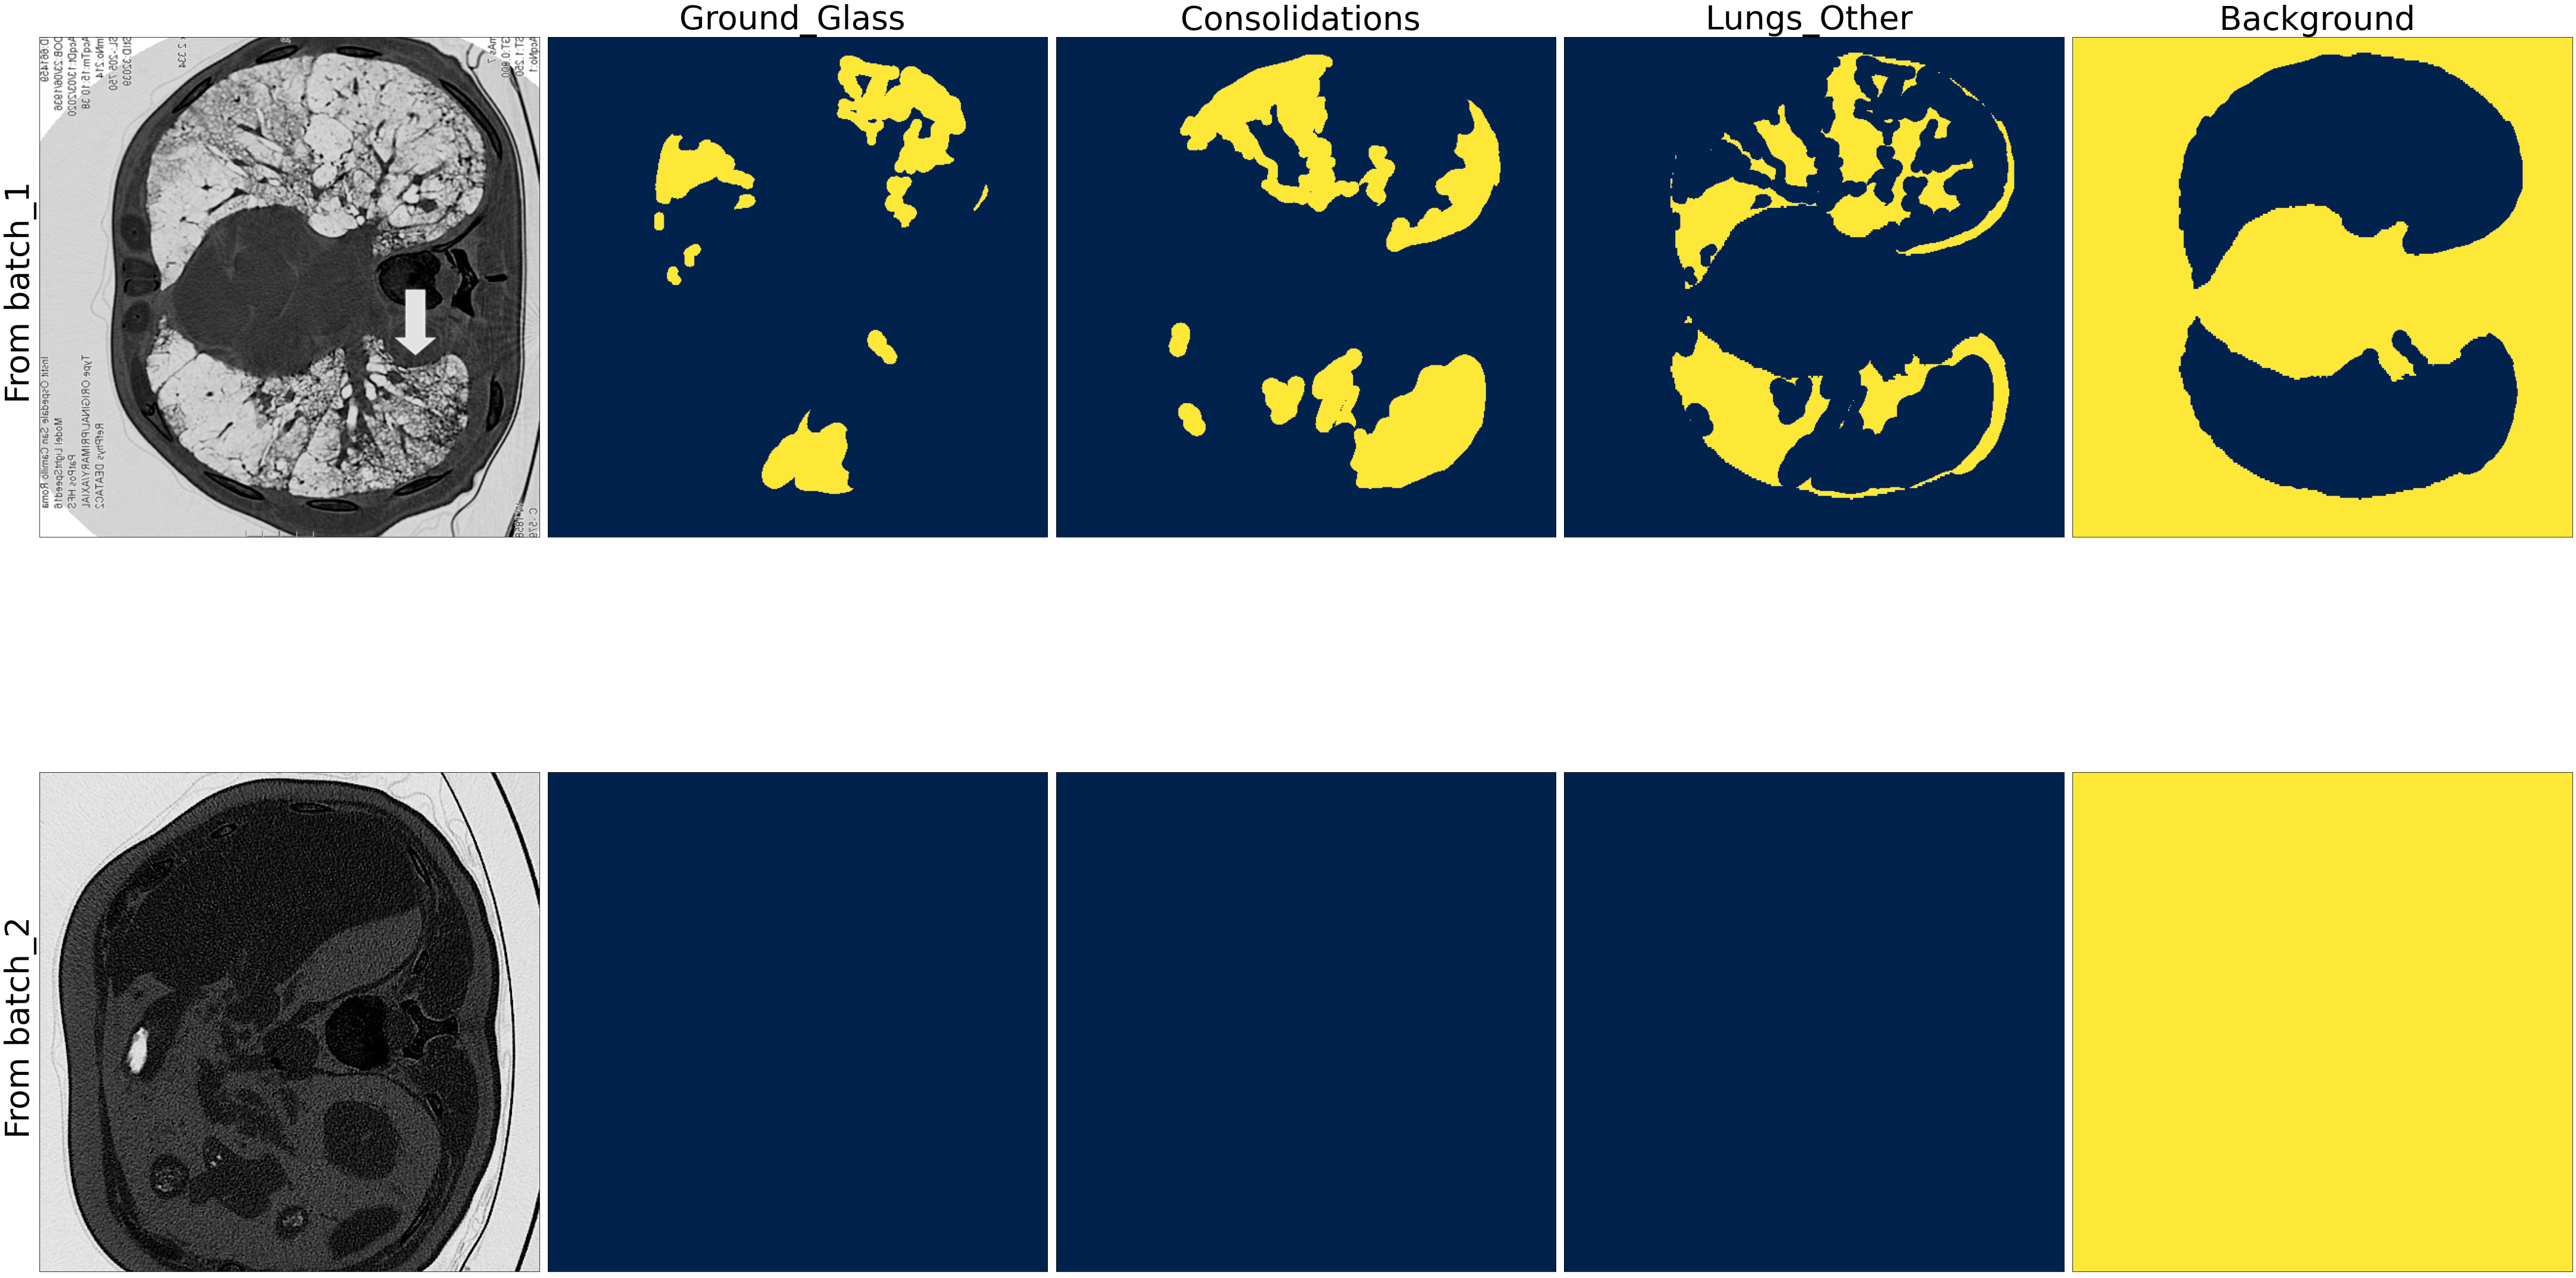

In [10]:
maxval = 9
i = np.random.randint(0, maxval)
visualize(batch_1=(load_case(med[0])[i], load_case(med[1])[i]),batch_2=(load_case(rad[0])[i], load_case(rad[1])[i]),pred=False)

(512, 512, 4)


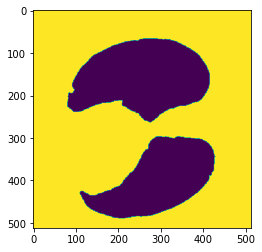

In [16]:
img=load_case(rad[1])
img1=img[20]
print(img1.shape)
plt.imshow(img1[:,:,3])

# Now, we convert the images from .npy to .jpg

# 829 images from rad: rad[0]:(images), rad[1]: [:,:,0](groundglass), [:,:,3](background)

In [17]:
def save_ct_image_GT(batch,batch_gt,outpath):
    for i in range(batch.shape[0]):
        print(i)
        img=np.squeeze(batch[i])
        img = (255*(img - np.min(img))/np.ptp(img)).astype(int) 
        #mask=1-np.squeeze(batch_gt[i][:,:,3])
        #img=img*mask
        plt.imsave(outpath+"Images/image"+f"{i}"+".jpg",img)  
        # Now we process the GT
        gt=1-np.squeeze(batch_gt[i][:,:,3])
        plt.imsave(outpath+"GT/image"+f"{i}"+".jpg",gt)

In [13]:
import os
os.getcwd()

'C:\\Users\\Sohini Roy\\Documents\\Unet_Project\\Paper-work\\code'

In [41]:
batch2=load_case(rad[0])
batch2_gt=load_case(rad[1])

In [ ]:
save_ct_image_GT(batch2,batch2_gt,'./covid-19-rad/')